<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2022</b></h3>

**Ник на kaggle: Илья Целковой**

**User Name: ilyatselkovoy**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Первая часть. Исследование

In [365]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [366]:
data = pd.read_csv('kaggle_data/train.csv')

In [367]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [368]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [369]:
type(data[num_cols[2]][0])

str

In [370]:
gap_number = 0
for i in data[num_cols[2]]:
    gap_number += int(i==' ')

gap_number

9

Экспериментальным путем я обнаружил, что в колонке 'TotalSpent' есть пропущенные значения -- пробелы. Поэтому она не перевелась во float и осталась str. В ячейке ниже я вручную перевожу данные этой колонки во float, а пропущенные значения заменяю средним.

In [371]:
sum = 0
n = 0
col = data[num_cols[2]]

for i in col:
    if i != ' ':
        sum += float(i)
        n += 1

mean = sum / n

for i in range(len(col)):
    if col[i] == ' ':
        col.update({i: m})
    else:
        col.update({i: float(col[i])})


Теперь мы можем построить гистограммы для каждой колонки.

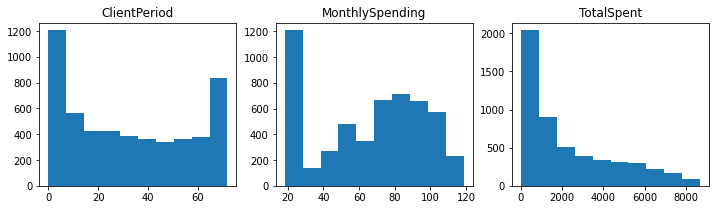

In [372]:
fig = plt.figure(figsize=(12, 3))
for i in range(len(num_cols)):
    ax = fig.add_subplot(1, 3, i+1)
    d = data[num_cols[i]]
    ax.hist(d)
    ax.set_title(d.name)


А так же круговые диаграммы для категориальных признаков.

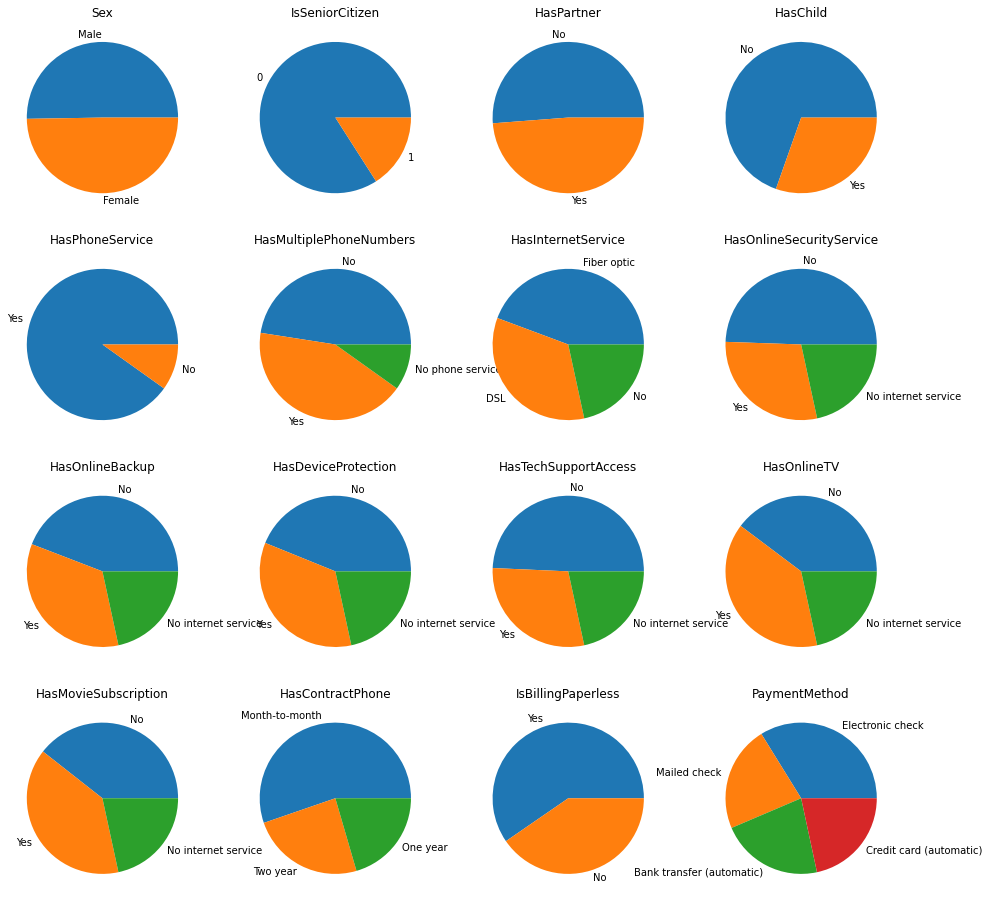

In [373]:
fig = plt.figure(figsize=(16, 16))
for i in range(len(cat_cols)):
    ax = fig.add_subplot(4, 4, i+1)
    d = data[cat_cols[i]].value_counts()
    ax.pie(d, labels=d.keys())
    ax.set_title(d.name)


Теперь посмотрим на распределение целевой переменной. Классы различаются примерно в 2.5 по объему. Этот случай не является примером сильного дисбаланса.

<AxesSubplot:>

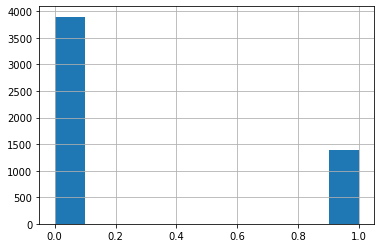

In [374]:
data[target_col].hist()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [407]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Используем кроссвалидацию.

In [436]:
num_prep = StandardScaler()
cat_prep = OneHotEncoder()

preprocessor = ColumnTransformer([
        ('num', num_prep, num_cols),
        ('cat', cat_prep, cat_cols)
        ])

log_reg = LogisticRegression()

classifier = Pipeline([
        ('preprocessor', preprocessor), 
        ('logistic', log_reg)
])

parameters = {'logistic__C': [96, 95, 94, 93]}

CV_model = GridSearchCV(classifier,
                        parameters,
                        scoring='roc_auc',
                        cv=5
                       )

CV_model.fit(data[num_cols+cat_cols], data[target_col])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'HasMultiplePhoneNumbers',
                                                                          'HasInternetService',
                                                                          'HasOnlineSecurityService',
                                                                          'HasOnlineBackup',
                                                                          'HasDeviceProtection',
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'IsBillingPaperless',
                                                                          'PaymentMethod'])])),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [96, 94, 95, 93]}, scoring='roc_auc')

In [437]:
CV_model.best_params_

{'logistic__C': 95}

In [438]:
CV_model.best_score_

0.8449915619281578

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

C = 95, ROC-AUC = 0.8449915619281578

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [440]:
from sklearn.model_selection import train_test_split

In [475]:
X_train, X_test, y_train, y_test = train_test_split(
    data[num_cols+cat_cols], 
    data[target_col], 
    test_size=0.2, 
    #random_state=42
)

In [476]:
from catboost import CatBoostClassifier

Тест с разными параметрами learning_rate не дал ничего лучше, чем автоматический подбор, заданный по дефолту.

In [477]:
CB_model = CatBoostClassifier(iterations=None, learning_rate=None, num_trees=100, custom_metric=None)

In [478]:
CB_model.fit(X_train, y_train,
          cat_features=cat_cols,
          eval_set=(X_test, y_test),
          logging_level='Verbose'
)

Learning rate set to 0.123165
0:	learn: 0.6482975	test: 0.6496284	best: 0.6496284 (0)	total: 10.8ms	remaining: 1.07s
1:	learn: 0.6131923	test: 0.6158632	best: 0.6158632 (1)	total: 21.7ms	remaining: 1.06s
2:	learn: 0.5838867	test: 0.5878144	best: 0.5878144 (2)	total: 33.3ms	remaining: 1.07s
3:	learn: 0.5612058	test: 0.5670459	best: 0.5670459 (3)	total: 44.8ms	remaining: 1.08s
4:	learn: 0.5418973	test: 0.5494615	best: 0.5494615 (4)	total: 56.2ms	remaining: 1.07s
5:	learn: 0.5253895	test: 0.5347021	best: 0.5347021 (5)	total: 66.6ms	remaining: 1.04s
6:	learn: 0.5104418	test: 0.5206746	best: 0.5206746 (6)	total: 78ms	remaining: 1.03s
7:	learn: 0.4986470	test: 0.5089218	best: 0.5089218 (7)	total: 89.8ms	remaining: 1.03s
8:	learn: 0.4872788	test: 0.4968420	best: 0.4968420 (8)	total: 101ms	remaining: 1.02s
9:	learn: 0.4766007	test: 0.4855681	best: 0.4855681 (9)	total: 113ms	remaining: 1.01s
10:	learn: 0.4678128	test: 0.4772661	best: 0.4772661 (10)	total: 124ms	remaining: 1s
11:	learn: 0.461187

95:	learn: 0.3820398	test: 0.4130769	best: 0.4113333 (75)	total: 1.06s	remaining: 44.3ms
96:	learn: 0.3814864	test: 0.4132661	best: 0.4113333 (75)	total: 1.08s	remaining: 33.4ms
97:	learn: 0.3812233	test: 0.4136320	best: 0.4113333 (75)	total: 1.09s	remaining: 22.3ms
98:	learn: 0.3809830	test: 0.4135549	best: 0.4113333 (75)	total: 1.11s	remaining: 11.2ms
99:	learn: 0.3808786	test: 0.4136694	best: 0.4113333 (75)	total: 1.12s	remaining: 0us

bestTest = 0.4113332902
bestIteration = 75

Shrink model to first 76 iterations.


In [479]:
from sklearn.metrics import roc_auc_score

In [480]:
preds = CB_model.predict_proba(X_test)

In [481]:
roc_auc_score(y_test, preds[:, 1])

0.8528756957328387

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

Бустинг показал лучшие результаты. Хотя они заметно зависят от случайности, которую вносит функция train_test_split. Обучим бустинг на всей обучающей выборке.

In [488]:
model = CatBoostClassifier(iterations=None, learning_rate=None, num_trees=150, custom_metric=None)

model.fit(data[num_cols+cat_cols],
          data[target_col],
          cat_features=cat_cols,
          logging_level='Verbose'
)

Learning rate set to 0.119424
0:	learn: 0.6514423	total: 11.3ms	remaining: 1.68s
1:	learn: 0.6164058	total: 22.7ms	remaining: 1.68s
2:	learn: 0.5876567	total: 34.5ms	remaining: 1.69s
3:	learn: 0.5648924	total: 45.8ms	remaining: 1.67s
4:	learn: 0.5443342	total: 58.1ms	remaining: 1.68s
5:	learn: 0.5284081	total: 69.9ms	remaining: 1.68s
6:	learn: 0.5143552	total: 81.6ms	remaining: 1.67s
7:	learn: 0.5026812	total: 93.4ms	remaining: 1.66s
8:	learn: 0.4916499	total: 105ms	remaining: 1.65s
9:	learn: 0.4816030	total: 117ms	remaining: 1.64s
10:	learn: 0.4727355	total: 129ms	remaining: 1.63s
11:	learn: 0.4656031	total: 141ms	remaining: 1.62s
12:	learn: 0.4592830	total: 152ms	remaining: 1.61s
13:	learn: 0.4541954	total: 164ms	remaining: 1.59s
14:	learn: 0.4492636	total: 176ms	remaining: 1.58s
15:	learn: 0.4459379	total: 183ms	remaining: 1.53s
16:	learn: 0.4413315	total: 191ms	remaining: 1.49s
17:	learn: 0.4373933	total: 202ms	remaining: 1.48s
18:	learn: 0.4339604	total: 218ms	remaining: 1.5s
19:	

In [489]:
X_test = pd.read_csv('kaggle_data/test.csv')
submission = pd.read_csv('kaggle_data/submission.csv')

submission['Churn'] = model.predict_proba(X_test)[:, 1]
submission['Churn'].to_csv('kaggle_data/my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.